In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163745 sha256=b06bd78d638b91d348d24ffc986716bf65a36a1502f95b88d34a268f4cd47718
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from geopy.distance import great_circle
!pip install geopy
from geopy.geocoders import Nominatim


In [ ]:
df = pd.read_excel('/content/zomato_clone.xlsx')

In [ ]:
df.head()

,Name,Rate,Online_order,Book_table,Votes,Location,Rest_type,Dish_liked,Cuisines,Approx_cost(for two people)
0,Jalsa,4.1,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,4.1,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0
2,San Churro Cafe,3.8,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,3.7,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0
4,Grand Village,3.8,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0


In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['Name', 'Location', 'Rate']], reader)

ValueError: ignored

In [ ]:
df = df[df['Rate'] != '-']

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['Name', 'Location', 'Rate']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

In [ ]:
model = SVD()
model.fit(trainset)

In [ ]:
predictions = model.test(testset)


In [ ]:
rmse = accuracy.rmse(predictions)


RMSE: 0.4104


In [ ]:
user_location = 'Location'  # Replace with the user's location
geolocator = Nominatim(user_agent="restaurant-recommender")
user_location = geolocator.geocode(user_location)
user_lat = user_location.latitude
user_lon = user_location.longitude

In [ ]:
df['distance'] = df.apply(lambda row: great_circle((user_lat, user_lon), (row['latitude'], row['longitude'])).kilometers, axis=1)


KeyError: ignored

In [ ]:
from geopy.geocoders import Nominatim

# Create a geolocator instance
geolocator = Nominatim(user_agent="restaurant-recommender")

# Example: Geocode a restaurant's address in Bengaluru
location = geolocator.geocode("Restaurant Address, Bengaluru, India")
latitude = location.latitude
longitude = location.longitude

In [ ]:
df.head()

,Name,Rate,Online_order,Book_table,Votes,Location,Rest_type,Dish_liked,Cuisines,Approx_cost(for two people)
0,Jalsa,4.1,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,4.1,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0
2,San Churro Cafe,3.8,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,3.7,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0
4,Grand Village,3.8,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0


In [ ]:
user_location = "Bengaluru, India"

# Creating a geolocator instance
geolocator = Nominatim(user_agent="restaurant-recommender")

# Function to calculate distance from user's location to a restaurant
def calculate_distance(row):
    restaurant_location = geolocator.geocode(row['Location'])
    if restaurant_location:
        user_coords = geolocator.geocode(user_location)
        restaurant_coords = (restaurant_location.latitude, restaurant_location.longitude)
        user_coords = (user_coords.latitude, user_coords.longitude)
        return great_circle(user_coords, restaurant_coords).kilometers
    return None

# Calculating distances for each restaurant in the DataFrame

# Filter restaurants within a certain distance threshold


This hasn't worked

#Trying to filter based on location

In [ ]:
unique_locations = df['Location'].unique()


In [ ]:
print("Available Locations:")
for i, location in enumerate(unique_locations, start=1):
    print(f"{i}. {location}")

Available Locations:
1. Banashankari
2. Basavanagudi
3. Mysore Road
4. Jayanagar
5. Kumaraswamy Layout
6. Rajarajeshwari Nagar
7. Vijay Nagar
8. Uttarahalli
9. JP Nagar
10. South Bangalore
11. City Market
12. Bannerghatta Road
13. BTM
14. Kanakapura Road
15. Bommanahalli
16. Electronic City
17. Sarjapur Road
18. Wilson Garden
19. Shanti Nagar
20. Koramangala 5th Block
21. Richmond Road
22. HSR
23. Koramangala 7th Block
24. Bellandur
25. Marathahalli
26. Whitefield
27. East Bangalore
28. Old Airport Road
29. Indiranagar
30. Koramangala 1st Block
31. Frazer Town
32. MG Road
33. Brigade Road
34. Lavelle Road
35. Church Street
36. Ulsoor
37. Residency Road
38. Shivajinagar
39. Infantry Road
40. St. Marks Road
41. Cunningham Road
42. Race Course Road
43. Commercial Street
44. Vasanth Nagar
45. Domlur
46. Koramangala 8th Block
47. Ejipura
48. Jeevan Bhima Nagar
49. Old Madras Road
50. Seshadripuram
51. Kammanahalli
52. Koramangala 6th Block
53. Majestic
54. Langford Town
55. Central Bangalor

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Create a Surprise Dataset for collaborative filtering
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['Name', 'Location', 'Rate']], reader)


In [ ]:
# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Build and train a Collaborative Filtering model (SVD)
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Calculate RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

RMSE: 0.3890
RMSE: 0.38904770297416874


In [ ]:
# Ask the user to choose a location
selected_location_index = int(input("Enter the number corresponding to your chosen location: "))
selected_location = unique_locations[selected_location_index - 1]

Enter the number corresponding to your chosen location: 1


In [ ]:
top_ratings = top_recommendations['Rate']

plt.figure(figsize=(10, 6))
plt.barh(top_recommendations['Name'], top_ratings, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.title(f'Top {top_n} Restaurants in {selected_location} Based on Rating')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest-rated restaurant at the top
plt.show()# Filter restaurants based on the selected location
selected_restaurants = df[df['Location'] == selected_location]

In [ ]:
# Sort the selected restaurants by rating
sorted_restaurants = selected_restaurants.sort_values(by='Rate', ascending=False)

In [ ]:
# Get the top N recommended restaurants in the selected location
top_n = 5  # Number of recommendations to provide
top_recommendations = sorted_restaurants.head(top_n)

Top 5 Restaurants in Banashankari:
Restaurant: Taaza Thindi, Rating: 4.7
Restaurant: Onesta, Rating: 4.6
Restaurant: Sri Laxmi Venkateshwara Coffee Bar, Rating: 4.4
Restaurant: Poonam Sweets, Rating: 4.4
Restaurant: Corner House Ice Cream, Rating: 4.3


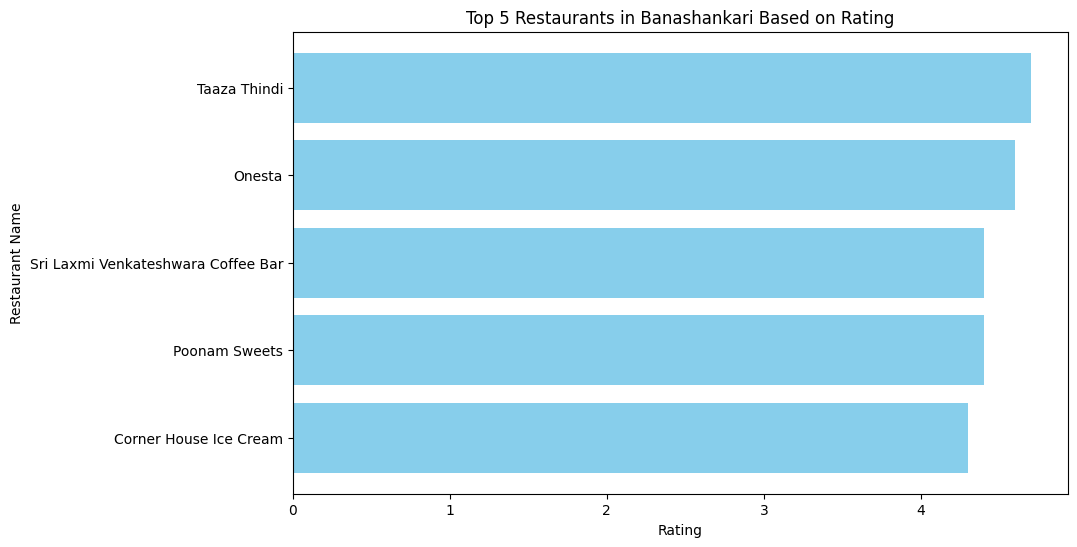

In [ ]:
# Print the top N recommended restaurant information
print(f"Top {top_n} Restaurants in {selected_location}:")
for index, row in top_recommendations.iterrows():
    print(f"Restaurant: {row['Name']}, Rating: {row['Rate']}")

top_ratings = top_recommendations['Rate']

plt.figure(figsize=(10, 6))
plt.barh(top_recommendations['Name'], top_ratings, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.title(f'Top {top_n} Restaurants in {selected_location} Based on Rating')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest-rated restaurant at the top
plt.show()